In [2]:
import tensorflow as tf
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
df = pd.read_csv('/content/AAPL.csv')

In [5]:
df = df[['Date', 'Open', 'Close']]
df

,Date,Open,Close
0,2000-06-14,0.845424,0.807478
1,2000-06-15,0.814732,0.824777
2,2000-06-16,0.834821,0.814174
3,2000-06-19,0.808594,0.862723
4,2000-06-20,0.879464,0.904018
...,...,...,...
5277,2021-06-07,126.169998,125.900002
5278,2021-06-08,126.599998,126.739998
5279,2021-06-09,127.209999,127.129997
5280,2021-06-10,127.019997,126.110001


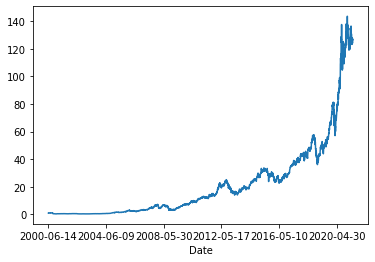

In [6]:
df.set_index('Date')['Open'].plot()

In [7]:
df.count()

Date     5282
Open     5282
Close    5282
dtype: int64

In [8]:
features = df[['Open']].to_numpy().tolist()
targets = df['Open'].tolist()

In [9]:
features[:11]

[[0.845424],
 [0.814732],
 [0.8348209999999999],
 [0.8085939999999999],
 [0.8794639999999999],
 [0.9017860000000001],
 [0.9955360000000001],
 [0.9603790000000001],
 [0.9375],
 [0.9603790000000001],
 [0.952009]]

In [10]:
targets[:11]

[0.845424,
 0.814732,
 0.8348209999999999,
 0.8085939999999999,
 0.8794639999999999,
 0.9017860000000001,
 0.9955360000000001,
 0.9603790000000001,
 0.9375,
 0.9603790000000001,
 0.952009]

In [11]:
len(features), len(targets)

(5282, 5282)

In [12]:
ts_generator = TimeseriesGenerator(features, targets, length=10, sampling_rate=1, batch_size=32)

In [ ]:
ts_generator[0]

In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, padding='causal', input_shape=[None, 1], activation='relu'),
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])

history = model.fit(ts_generator, epochs=10)

Epoch 1/10
165/165 [==============================] - 11s 33ms/step - loss: 804.9987 - mse: 804.9987
Epoch 2/10
165/165 [==============================] - 6s 33ms/step - loss: 117.1185 - mse: 117.1185
Epoch 3/10
165/165 [==============================] - 6s 33ms/step - loss: 96.2719 - mse: 96.2719
Epoch 4/10
165/165 [==============================] - 6s 33ms/step - loss: 88.1666 - mse: 88.1666
Epoch 5/10
165/165 [==============================] - 5s 33ms/step - loss: 46.6452 - mse: 46.6452
Epoch 6/10
165/165 [==============================] - 6s 33ms/step - loss: 24.0964 - mse: 24.0964
Epoch 7/10
165/165 [==============================] - 5s 33ms/step - loss: 13.6785 - mse: 13.6785
Epoch 8/10
165/165 [==============================] - 5s 33ms/step - loss: 32.7715 - mse: 32.7715
Epoch 9/10
165/165 [==============================] - 5s 33ms/step - loss: 79.1884 - mse: 79.1884
Epoch 10/10
165/165 [==============================] - 5s 33ms/step - loss: 42.6927 - mse: 42.6927


In [43]:
predictions = model.predict(ts_generator)

In [60]:
truth = features[10:]

In [65]:
print(predictions[-1])

[135.55113]
